# Cryptocurrency Price Prediction using ARIMA

## Overview

This project forecasts the future price of a cryptocurrency (e.g., BTC/USD) using historical data. It aggregates minute-level data into daily close prices and then uses an ARIMA (AutoRegressive Integrated Moving Average) model to forecast the next 7 days of prices. The project also visualizes the historical data along with the forecast and its confidence intervals.

## Features

- **Data Aggregation:** Converts minute-level cryptocurrency price data into daily prices by selecting the last "Close" price of each day.
- **Missing Data Handling:** Interpolates missing daily data to produce a continuous time series.
- **ARIMA Forecasting:** Fits an ARIMA(1,1,1) model to the daily time series and forecasts future prices.
- **Visualization:** Plots the historical daily prices, forecasted values, and corresponding confidence intervals using Matplotlib.

## Data

The program requires a CSV file (`btcusd_1-min_data.csv`) containing minute-level BTC/USD data with at least the following columns:
- **datetime:** The date and time of the price observation.
- **Close:** The closing price for that minute.

Make sure that the `datetime` column is in a format that can be parsed as a datetime by Pandas. If your CSV file uses different column names, update the code accordingly.

## Installation and Requirements

### Prerequisites
- Python 3.7 or higher
- pip

### Required Python Libraries
- pandas
- numpy
- matplotlib
- statsmodels

### Installing Dependencies

You can install the required Python libraries using pip. For example:
```bash
pip install pandas numpy matplotlib statsmodels


Preview of daily aggregated data:
                              Timestamp  Open  High   Low  Price  Volume
datetime                                                                
2012-01-01 00:00:00+00:00  1.325462e+09  4.84  4.84  4.84   4.84     0.0
2012-01-02 00:00:00+00:00  1.325549e+09  5.00  5.00  5.00   5.00     0.0
2012-01-03 00:00:00+00:00  1.325635e+09  5.29  5.29  5.29   5.29     0.0
2012-01-04 00:00:00+00:00  1.325722e+09  5.57  5.57  5.57   5.57     0.0
2012-01-05 00:00:00+00:00  1.325808e+09  6.42  6.42  6.42   6.42     0.0


c:\Users\amiro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\amiro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\amiro\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



ARIMA Forecast for the next 7 days:
Price                              mean  mean_ci_lower  mean_ci_upper
2025-03-16 00:00:00+00:00  84057.044568   82284.567616   85829.521519
2025-03-17 00:00:00+00:00  84049.600240   81598.218141   86500.982339
2025-03-18 00:00:00+00:00  84053.283830   81051.463056   87055.104603
2025-03-19 00:00:00+00:00  84051.461122   80595.181829   87507.740415
2025-03-20 00:00:00+00:00  84052.363031   80190.534018   87914.192044
2025-03-21 00:00:00+00:00  84051.916750   79825.184130   88278.649370
2025-03-22 00:00:00+00:00  84052.137578   79488.709093   88615.566064


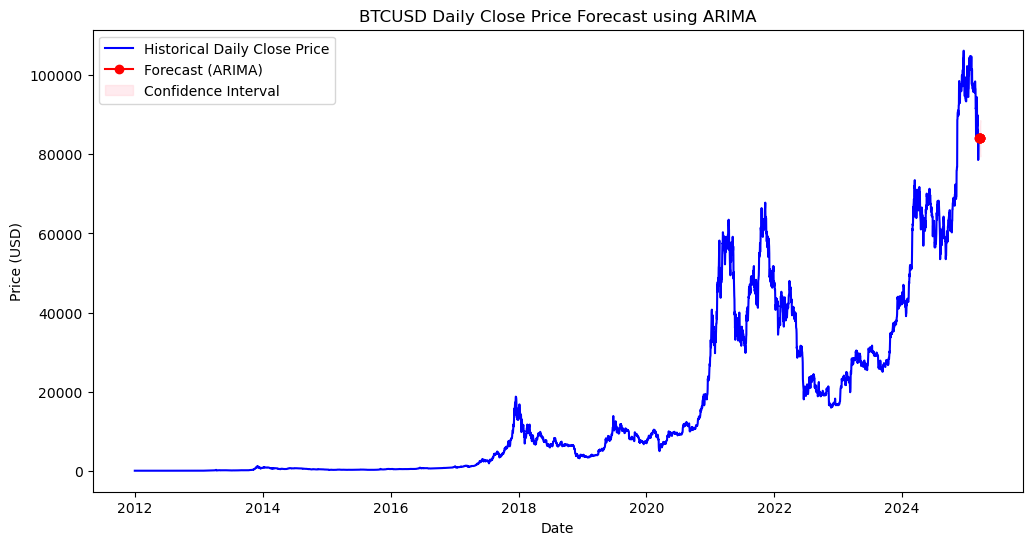

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def main():
    # Load minute-level BTCUSD data from CSV.
    # Assumes the CSV has columns "Timestamp" and "Close"
    df = pd.read_csv("btcusd_1-min_data.csv", parse_dates=['datetime'])
    
    # Check if the 'Timestamp' column is actually parsed as datetime.
    # If not, convert it explicitly.
    if not pd.api.types.is_datetime64_any_dtype(df['datetime']):
        df['datetime'] = pd.to_datetime(df['datetime'])
    
    # Set the Timestamp column as the index.
    df.set_index('datetime', inplace=True)
   
    
    # Sort the DataFrame by date (index) in case it's not already sorted.
    df.sort_index(inplace=True)
    
    # Resample the data to a daily frequency by taking the last "Close" price for each day.
    daily_df = df.resample("D").last()
    
    # Rename "Close" to "Price" for clarity.
    daily_df.rename(columns={'Close': 'Price'}, inplace=True)
    
    # In case there are missing values (days without data), interpolate the prices.
    daily_df['Price'] = daily_df['Price'].interpolate()
    
    # Print a preview of the daily aggregated data.
    print("Preview of daily aggregated data:")
    print(daily_df.head())
    
    # Fit an ARIMA model to the daily price data.
    # The order (1, 1, 1) is an initial guess; you may need to optimize it for your data.
    model = ARIMA(daily_df['Price'], order=(1, 1, 1))
    model_fit = model.fit()
    
    # Forecast the next 7 days.
    steps = 7
    forecast = model_fit.get_forecast(steps=steps)
    forecast_df = forecast.summary_frame()
    
    # Create a new date index for the forecast period.
    forecast_index = pd.date_range(start=daily_df.index[-1] + pd.Timedelta(days=1), periods=steps, freq='D')
    forecast_df.index = forecast_index
    
    # Print forecast results.
    print("\nARIMA Forecast for the next 7 days:")
    print(forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']])
    
    # Plot historical prices and the ARIMA forecast.
    plt.figure(figsize=(12, 6))
    plt.plot(daily_df['Price'], label='Historical Daily Close Price', color='blue')
    plt.plot(forecast_df['mean'], label='Forecast (ARIMA)', color='red', marker='o')
    plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'],
                     color='pink', alpha=0.3, label='Confidence Interval')
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title("BTCUSD Daily Close Price Forecast using ARIMA")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
